In [1]:
import pandas as pd 
from bs4 import BeautifulSoup
import requests

In [2]:
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    # Requests sorts cookies= alphabetically
    # 'cookie': 'session-id=259-3113978-6678618; i18n-prefs=INR; ubid-acbin=260-8554202-6973909; lc-acbin=en_IN; csm-hit=tb:BS866TA0AKH6X86N924E+sa-7XYTQAXQHJP5ADH88228-DY27HYE0CK5V9FW24GBD|1656009294944&t:1656009294945&adb:adblk_yes; session-token=Z1j175VoYxPr2Un/9ciL3Q6lKw+QtLYYIwSQ+GLxjT06952u8vOZromD4WcFE0bs+yrUyLPy8HmIn7mTjUt8qsx3n0meC7yWKFqqwDEm5iecYedklsrNwmDrQOiaMH9lpacbdB8kgUk5IbZdg1VyhrdnY4OZrk6r350ARDEXJExuu2GZr0sV4fpbwUes/V9fDrfASeMQhVEEzmEAAHWN2g==; session-id-time=2082758401l',
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/dp/B09WQY65HN/ref=sr_1_4?crid=1D99WHM86WX80&keywords=oneplus&qid=1656009113&sprefix=onep%2Caps%2C315&sr=8-4&th=1',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}

In [3]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [4]:
reviewlist = []
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews: ', '').strip(),    
            'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [5]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [6]:
from tqdm import tqdm_notebook
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/OnePlus-Nord-Mirror-128GB-Storage/product-reviews/B09RG132Q5/\
    ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

C:\Users\prabi\AppData\Local\Temp\ipykernel_1740\3999904684.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x in tqdm_notebook(range(1,1000)):


  0%|          | 0/999 [00:00<?, ?it/s]

In [7]:
df = pd.DataFrame(reviewlist)
df

Rating                                              Title  \
0      4.0  4.0 out of 5 stars\nGood phone-could have been...   
1      4.0         4.0 out of 5 stars\nA mildly perfect phone   
2      4.0              4.0 out of 5 stars\nNice budget phone   
3      4.0                  4.0 out of 5 stars\nSuper product   
4      4.0                     4.0 out of 5 stars\nGood phone   
..     ...                                                ...   
95     4.0                 4.0 out of 5 stars\nBest in budget   
96     4.0  4.0 out of 5 stars\nNice 5G phone at a decent ...   
97     4.0                    4.0 out of 5 stars\nAbout phone   
98     5.0                           5.0 out of 5 stars\nBest   
99     4.0                           4.0 out of 5 stars\nGood   

                                               Review  \
0   I've purchased the 6GB version of this phone w...   
1   I will try to keep this review short. This rev...   
2   Good phone in a low budget, just the sides are...   
3   This review is after using this phone for 2 mo...   
4                                 Cam is nt that good   
..                                                ...   
95  Camera quality is little bit low than its own ...   
96  I loved the colour (sky blue), which looked ex...   
97                                    Awesome 📱 Phone   
98  Perfect phone in mid range. One of the best pr...   
99                                                      

                                 Review_Date  
0   Reviewed in India 🇮🇳 on 19 December 2022  
1    Reviewed in India 🇮🇳 on 12 January 2023  
2       Reviewed in India 🇮🇳 on 17 June 2023  
3        Reviewed in India 🇮🇳 on 3 June 2023  
4       Reviewed in India 🇮🇳 on 12 June 2023  
..                                       ...  
95     Reviewed in India 🇮🇳 on 29 April 2023  
96      Reviewed in India 🇮🇳 on 2 April 2023  
97        Reviewed in India 🇮🇳 on 2 May 2023  
98      Reviewed in India 🇮🇳 on 11 June 2023  
99        Reviewed in India 🇮🇳 on 2 May 2023  

[100 rows x 4 columns]

In [9]:
df.to_csv("Amazon_Reviews_Oneplus_Nord_CE2.csv")

In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import time
import string
import warnings
import spacy
from tqdm.notebook import tqdm_notebook

# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prabi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prabi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\prabi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\prabi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\prabi\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prabi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is alr

In [11]:
# load the dataset
reviews=pd.read_csv('Amazon_Reviews_Oneplus_Nord_CE2.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

Rating                                              Title  \
0      4.0  4.0 out of 5 stars\nGood phone-could have been...   
1      4.0         4.0 out of 5 stars\nA mildly perfect phone   
2      4.0              4.0 out of 5 stars\nNice budget phone   
3      4.0                  4.0 out of 5 stars\nSuper product   
4      4.0                     4.0 out of 5 stars\nGood phone   
..     ...                                                ...   
95     4.0                 4.0 out of 5 stars\nBest in budget   
96     4.0  4.0 out of 5 stars\nNice 5G phone at a decent ...   
97     4.0                    4.0 out of 5 stars\nAbout phone   
98     5.0                           5.0 out of 5 stars\nBest   
99     4.0                           4.0 out of 5 stars\nGood   

                                               Review  \
0   I've purchased the 6GB version of this phone w...   
1   I will try to keep this review short. This rev...   
2   Good phone in a low budget, just the sides are...   
3   This review is after using this phone for 2 mo...   
4                                 Cam is nt that good   
..                                                ...   
95  Camera quality is little bit low than its own ...   
96  I loved the colour (sky blue), which looked ex...   
97                                    Awesome 📱 Phone   
98  Perfect phone in mid range. One of the best pr...   
99                                                NaN   

                                 Review_Date  
0   Reviewed in India 🇮🇳 on 19 December 2022  
1    Reviewed in India 🇮🇳 on 12 January 2023  
2       Reviewed in India 🇮🇳 on 17 June 2023  
3        Reviewed in India 🇮🇳 on 3 June 2023  
4       Reviewed in India 🇮🇳 on 12 June 2023  
..                                       ...  
95     Reviewed in India 🇮🇳 on 29 April 2023  
96      Reviewed in India 🇮🇳 on 2 April 2023  
97        Reviewed in India 🇮🇳 on 2 May 2023  
98      Reviewed in India 🇮🇳 on 11 June 2023  
99        Reviewed in India 🇮🇳 on 2 May 2023  

[100 rows x 4 columns]

In [12]:
reviews.Rating.describe()

count    100.000000
mean       4.030000
std        0.171447
min        4.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: Rating, dtype: float64

In [13]:
reviews['word_count'] = reviews['Review'].apply(lambda x: len(str(x).split(" ")))
reviews[['Review','word_count']].head()

Review  word_count
0  I've purchased the 6GB version of this phone w...         299
1  I will try to keep this review short. This rev...         216
2  Good phone in a low budget, just the sides are...          18
3  This review is after using this phone for 2 mo...          61
4                                Cam is nt that good           5

In [14]:
reviews['char_count'] = reviews['Review'].str.len() ## this also includes spaces
reviews[['Review','char_count']].head()

Review  char_count
0  I've purchased the 6GB version of this phone w...      1715.0
1  I will try to keep this review short. This rev...      1189.0
2  Good phone in a low budget, just the sides are...        91.0
3  This review is after using this phone for 2 mo...       355.0
4                                Cam is nt that good        19.0

In [15]:
def avg_word(sentence):
  words = str(sentence).split()
  return (sum(len(word) for word in words)/len(words))

reviews['avg_word'] = reviews['Review'].apply(lambda x: avg_word(x))
reviews[['Review','avg_word']].head()

Review  avg_word
0  I've purchased the 6GB version of this phone w...  4.755034
1  I will try to keep this review short. This rev...  4.509259
2  Good phone in a low budget, just the sides are...  4.111111
3  This review is after using this phone for 2 mo...  4.836066
4                                Cam is nt that good  3.000000

In [16]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

reviews['stopwords'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
reviews[['Review','stopwords']].head()

Review  stopwords
0  I've purchased the 6GB version of this phone w...        128
1  I will try to keep this review short. This rev...         94
2  Good phone in a low budget, just the sides are...          9
3  This review is after using this phone for 2 mo...         22
4                                Cam is nt that good          2

In [17]:
reviews['hashtags'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
reviews[['Review','hashtags']].head()

Review  hashtags
0  I've purchased the 6GB version of this phone w...         0
1  I will try to keep this review short. This rev...         0
2  Good phone in a low budget, just the sides are...         0
3  This review is after using this phone for 2 mo...         0
4                                Cam is nt that good         0

In [18]:
reviews['numerics'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
reviews[['Review','numerics']].head()

Review  numerics
0  I've purchased the 6GB version of this phone w...         2
1  I will try to keep this review short. This rev...         0
2  Good phone in a low budget, just the sides are...         0
3  This review is after using this phone for 2 mo...         3
4                                Cam is nt that good         0

In [19]:
reviews['upper'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
reviews[['Review','upper']].head()

Review  upper
0  I've purchased the 6GB version of this phone w...      4
1  I will try to keep this review short. This rev...      3
2  Good phone in a low budget, just the sides are...      0
3  This review is after using this phone for 2 mo...      1
4                                Cam is nt that good      0

In [20]:
reviews.drop(['numerics','stopwords','avg_word','char_count','word_count'],axis=1,inplace=True)

In [21]:
from textblob import TextBlob
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    I've purchased the 6GB version of this phone w...
1    I will try to keep this review short. His revi...
2    Good phone in a low budget, just the sides are...
3    His review is after using this phone for 2 mon...
4                                   Am is it that good
Name: Review, dtype: object

In [22]:
print(reviews['Review_Date'].str.split(' ').str[0],'\n',
      reviews['Review_Date'].str.split(' ').str[1],'\n',
      reviews['Review_Date'].str.split(' ').str[2])

0     Reviewed
1     Reviewed
2     Reviewed
3     Reviewed
4     Reviewed
        ...   
95    Reviewed
96    Reviewed
97    Reviewed
98    Reviewed
99    Reviewed
Name: Review_Date, Length: 100, dtype: object 
 0     in
1     in
2     in
3     in
4     in
      ..
95    in
96    in
97    in
98    in
99    in
Name: Review_Date, Length: 100, dtype: object 
 0     India
1     India
2     India
3     India
4     India
      ...  
95    India
96    India
97    India
98    India
99    India
Name: Review_Date, Length: 100, dtype: object


In [23]:
df=reviews.copy()
df['Date']=df['Review_Date'].str.split(' ').str[0]
df['Month']=df['Review_Date'].str.split(' ').str[1]
df['Year']=df['Review_Date'].str.split(' ').str[2]
df[['Date','Month','Year']]

Date Month   Year
0   Reviewed    in  India
1   Reviewed    in  India
2   Reviewed    in  India
3   Reviewed    in  India
4   Reviewed    in  India
..       ...   ...    ...
95  Reviewed    in  India
96  Reviewed    in  India
97  Reviewed    in  India
98  Reviewed    in  India
99  Reviewed    in  India

[100 rows x 3 columns]

In [24]:
df.Month.value_counts()

in      70
May     20
June    10
Name: Month, dtype: int64

In [25]:
order={'Month':{'February':2,'March':3,'April':4,'May':5,'June':6}}
df1= df.copy()
df1=df1.replace(order)
df1[['Month']]

Month
0     in
1     in
2     in
3     in
4     in
..   ...
95    in
96    in
97    in
98    in
99    in

[100 rows x 1 columns]

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       100 non-null    float64
 1   Title        100 non-null    object 
 2   Review       99 non-null     object 
 3   Review_Date  100 non-null    object 
 4   hashtags     100 non-null    int64  
 5   upper        100 non-null    int64  
 6   Date         100 non-null    object 
 7   Month        100 non-null    object 
 8   Year         100 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 7.2+ KB


In [27]:
df1.drop('Review_Date',axis=1, inplace=True)
df1.head()

Rating                                              Title  \
0     4.0  4.0 out of 5 stars\nGood phone-could have been...   
1     4.0         4.0 out of 5 stars\nA mildly perfect phone   
2     4.0              4.0 out of 5 stars\nNice budget phone   
3     4.0                  4.0 out of 5 stars\nSuper product   
4     4.0                     4.0 out of 5 stars\nGood phone   

                                              Review  hashtags  upper  \
0  I've purchased the 6GB version of this phone w...         0      4   
1  I will try to keep this review short. This rev...         0      3   
2  Good phone in a low budget, just the sides are...         0      0   
3  This review is after using this phone for 2 mo...         0      1   
4                                Cam is nt that good         0      0   

       Date Month   Year  
0  Reviewed    in  India  
1  Reviewed    in  India  
2  Reviewed    in  India  
3  Reviewed    in  India  
4  Reviewed    in  India

In [28]:
df

Rating                                              Title  \
0      4.0  4.0 out of 5 stars\nGood phone-could have been...   
1      4.0         4.0 out of 5 stars\nA mildly perfect phone   
2      4.0              4.0 out of 5 stars\nNice budget phone   
3      4.0                  4.0 out of 5 stars\nSuper product   
4      4.0                     4.0 out of 5 stars\nGood phone   
..     ...                                                ...   
95     4.0                 4.0 out of 5 stars\nBest in budget   
96     4.0  4.0 out of 5 stars\nNice 5G phone at a decent ...   
97     4.0                    4.0 out of 5 stars\nAbout phone   
98     5.0                           5.0 out of 5 stars\nBest   
99     4.0                           4.0 out of 5 stars\nGood   

                                               Review  \
0   I've purchased the 6GB version of this phone w...   
1   I will try to keep this review short. This rev...   
2   Good phone in a low budget, just the sides are...   
3   This review is after using this phone for 2 mo...   
4                                 Cam is nt that good   
..                                                ...   
95  Camera quality is little bit low than its own ...   
96  I loved the colour (sky blue), which looked ex...   
97                                    Awesome 📱 Phone   
98  Perfect phone in mid range. One of the best pr...   
99                                                NaN   

                                 Review_Date  hashtags  upper      Date Month  \
0   Reviewed in India 🇮🇳 on 19 December 2022         0      4  Reviewed    in   
1    Reviewed in India 🇮🇳 on 12 January 2023         0      3  Reviewed    in   
2       Reviewed in India 🇮🇳 on 17 June 2023         0      0  Reviewed    in   
3        Reviewed in India 🇮🇳 on 3 June 2023         0      1  Reviewed    in   
4       Reviewed in India 🇮🇳 on 12 June 2023         0      0  Reviewed    in   
..                                       ...       ...    ...       ...   ...   
95     Reviewed in India 🇮🇳 on 29 April 2023         0      0  Reviewed    in   
96      Reviewed in India 🇮🇳 on 2 April 2023         0      8  Reviewed    in   
97        Reviewed in India 🇮🇳 on 2 May 2023         0      0  Reviewed    in   
98      Reviewed in India 🇮🇳 on 11 June 2023         0      0  Reviewed    in   
99        Reviewed in India 🇮🇳 on 2 May 2023         0      0  Reviewed    in   

     Year  
0   India  
1   India  
2   India  
3   India  
4   India  
..    ...  
95  India  
96  India  
97  India  
98  India  
99  India  

[100 rows x 9 columns]

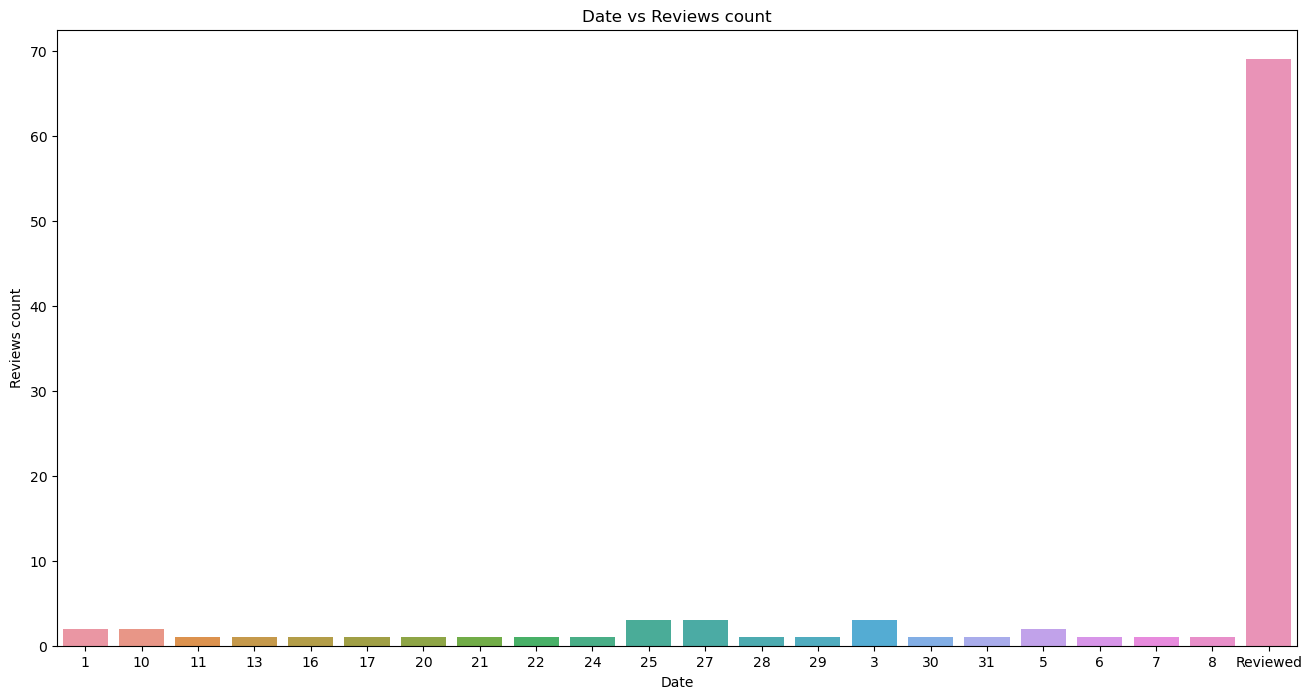

In [29]:
#Creating a dataframe
dayreview = pd.DataFrame(df.groupby('Date')['Review'].count()).reset_index()

dayreview.sort_values(by = ['Date'])

#Plotting the graph
plt.figure(figsize=(16,8))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews count')
plt.xlabel('Date')
plt.ylabel('Reviews count')
plt.show()

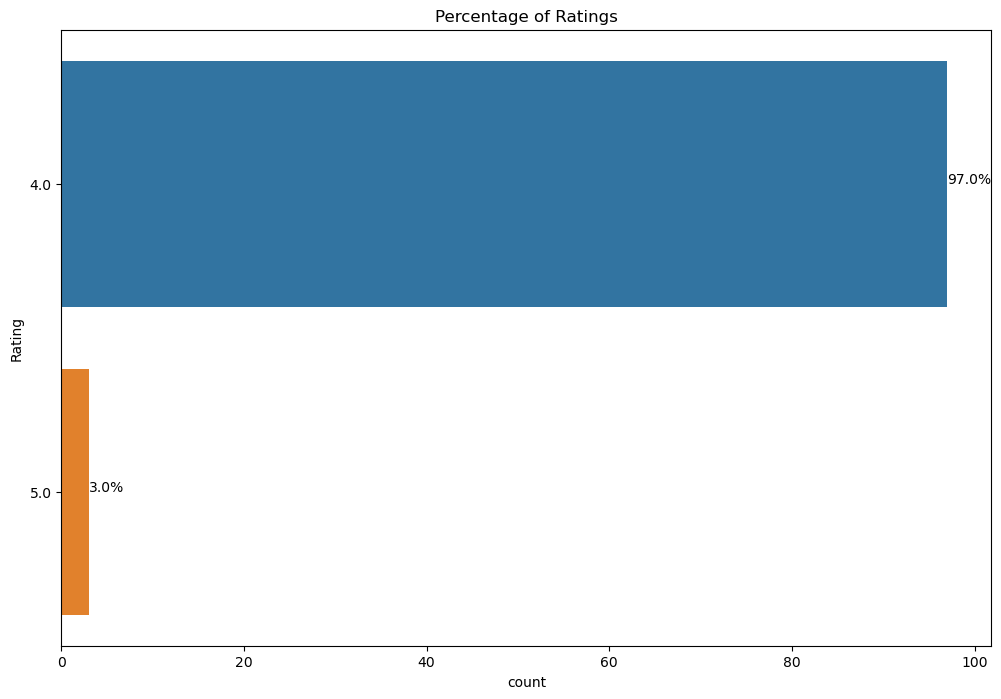

In [30]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

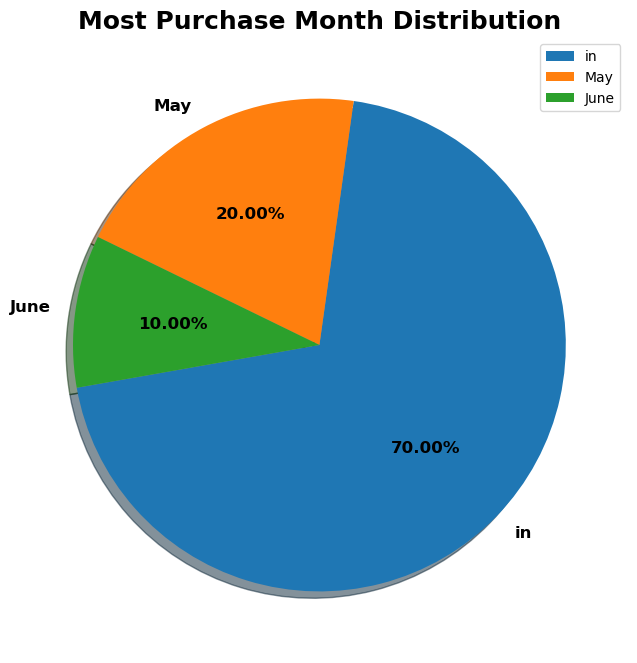

In [31]:
plt.figure(figsize = (12,8))
plt.pie(df['Month'].value_counts(),
       labels=df['Month'].value_counts().index,
       
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Most Purchase Month Distribution", fontsize = 18, fontweight = 'bold')
plt.show()

In [32]:
data = df[['Review']]
data

Review
0   I've purchased the 6GB version of this phone w...
1   I will try to keep this review short. This rev...
2   Good phone in a low budget, just the sides are...
3   This review is after using this phone for 2 mo...
4                                 Cam is nt that good
..                                                ...
95  Camera quality is little bit low than its own ...
96  I loved the colour (sky blue), which looked ex...
97                                    Awesome 📱 Phone
98  Perfect phone in mid range. One of the best pr...
99                                                NaN

[100 rows x 1 columns]

In [33]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))
data

Review
0   i've purchased 6gb version phone comes extenda...
1   i try keep review short. this review perspecti...
2   good phone low budget, sides curved make diffi...
3   this review using phone 2 months.very nice pho...
4                                         cam nt good
..                                                ...
95  camera quality little bit low high price versi...
96  i loved colour (sky blue), looked exceptional ...
97                                    awesome 📱 phone
98  perfect phone mid range. one best product mark...
99                                                nan

[100 rows x 1 columns]

In [34]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(data))):
    cleaned= re.sub('[^a-zA-Z]', " ", data["Review"][i])
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/100 [00:00<?, ?it/s]

In [35]:
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": df.Review})
dataframe.head()

Clean_Reviews  \
0  purchased gb version phone come extendable gb ...   
1  try keep review short review perspective avera...   
2  good phone low budget side curved make difficu...   
3  review using phone month nice phone budget ram...   
4                                        cam nt good   

                                   Uncleaned_Reviews  
0  I've purchased the 6GB version of this phone w...  
1  I will try to keep this review short. This rev...  
2  Good phone in a low budget, just the sides are...  
3  This review is after using this phone for 2 mo...  
4                                Cam is nt that good

In [36]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [37]:
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

Clean_Reviews  \
0  purchased gb version phone come extendable gb ...   
1  try keep review short review perspective avera...   
2  good phone low budget side curved make difficu...   
3  review using phone month nice phone budget ram...   
4                                        cam nt good   
5             camera nice battery capacity advantage   
6                        wide angle camera ki kami h   
7                        nice battery camera amazing   
8  never know android device feel look better low...   
9                                               good   

                                   Uncleaned_Reviews  
0  I've purchased the 6GB version of this phone w...  
1  I will try to keep this review short. This rev...  
2  Good phone in a low budget, just the sides are...  
3  This review is after using this phone for 2 mo...  
4                                Cam is nt that good  
5  Camera is nice. Battery capacity is an advantage.  
6                        Wide angle camera ki kami h  
7                   Nice battery+camera is amazing 🤩  
8  You never know with android devices. But feels...  
9                                          Very good

In [38]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

Clean_Reviews  \
0  purchased gb version phone come extendable gb ...   
1  try keep review short review perspective avera...   
2  good phone low budget side curved make difficu...   
3  review using phone month nice phone budget ram...   
4                                        cam nt good   
5             camera nice battery capacity advantage   
6                        wide angle camera ki kami h   
7                        nice battery camera amazing   
8  never know android device feel look better low...   
9                                               good   

                                   Uncleaned_Reviews  
0  I've purchased the 6GB version of this phone w...  
1  I will try to keep this review short. This rev...  
2  Good phone in a low budget, just the sides are...  
3  This review is after using this phone for 2 mo...  
4                                Cam is nt that good  
5  Camera is nice. Battery capacity is an advantage.  
6                        Wide angle camera ki kami h  
7                   Nice battery+camera is amazing 🤩  
8  You never know with android devices. But feels...  
9                                          Very good

In [39]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

Clean_Reviews  \
0  purchased gb version phone come extendable gb ...   
1  try keep review short review perspective avera...   
2  good phone low budget side curved make difficu...   
3  review using phone month nice phone budget ram...   
4                                        cam nt good   
5             camera nice battery capacity advantage   
6                        wide angle camera ki kami h   
7                        nice battery camera amazing   
8  never know android device feel look better low...   
9                                               good   

                                   Uncleaned_Reviews  
0  I've purchased the 6GB version of this phone w...  
1  I will try to keep this review short. This rev...  
2  Good phone in a low budget, just the sides are...  
3  This review is after using this phone for 2 mo...  
4                                Cam is nt that good  
5  Camera is nice. Battery capacity is an advantage.  
6                        Wide angle camera ki kami h  
7                   Nice battery+camera is amazing 🤩  
8  You never know with android devices. But feels...  
9                                          Very good

In [40]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

Clean_Reviews  \
0  purchased gb version phone come extendable gb ...   
1  try keep review short review perspective avera...   
2  good phone low budget side curved make difficu...   
3  review using phone month nice phone budget ram...   
4                                        cam nt good   
5             camera nice battery capacity advantage   
6                        wide angle camera ki kami h   
7                        nice battery camera amazing   
8  never know android device feel look better low...   
9                                               good   

                                   Uncleaned_Reviews  
0  I've purchased the 6GB version of this phone w...  
1  I will try to keep this review short. This rev...  
2  Good phone in a low budget, just the sides are...  
3  This review is after using this phone for 2 mo...  
4                                Cam is nt that good  
5  Camera is nice. Battery capacity is an advantage.  
6                        Wide angle camera ki kami h  
7                   Nice battery+camera is amazing 🤩  
8  You never know with android devices. But feels...  
9                                          Very good

In [41]:
dataframe = dataframe.reset_index(drop=True)
dataframe.head(10)

Clean_Reviews  \
0  purchased gb version phone come extendable gb ...   
1  try keep review short review perspective avera...   
2  good phone low budget side curved make difficu...   
3  review using phone month nice phone budget ram...   
4                                        cam nt good   
5             camera nice battery capacity advantage   
6                        wide angle camera ki kami h   
7                        nice battery camera amazing   
8  never know android device feel look better low...   
9                                               good   

                                   Uncleaned_Reviews  
0  I've purchased the 6GB version of this phone w...  
1  I will try to keep this review short. This rev...  
2  Good phone in a low budget, just the sides are...  
3  This review is after using this phone for 2 mo...  
4                                Cam is nt that good  
5  Camera is nice. Battery capacity is an advantage.  
6                        Wide angle camera ki kami h  
7                   Nice battery+camera is amazing 🤩  
8  You never know with android devices. But feels...  
9                                          Very good

In [42]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [43]:
dataframe['Clean_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: clean_text(x))
dataframe.head(10)

Clean_Reviews  \
0  purchased gb version phone come extendable gb ...   
1  try keep review short review perspective avera...   
2  good phone low budget side curved make difficu...   
3  review using phone month nice phone budget ram...   
4                                        cam nt good   
5             camera nice battery capacity advantage   
6                        wide angle camera ki kami h   
7                        nice battery camera amazing   
8  never know android device feel look better low...   
9                                               good   

                                   Uncleaned_Reviews  
0  I've purchased the 6GB version of this phone w...  
1  I will try to keep this review short. This rev...  
2  Good phone in a low budget, just the sides are...  
3  This review is after using this phone for 2 mo...  
4                                Cam is nt that good  
5  Camera is nice. Battery capacity is an advantage.  
6                        Wide angle camera ki kami h  
7                   Nice battery+camera is amazing 🤩  
8  You never know with android devices. But feels...  
9                                          Very good

In [44]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [45]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

Clean_Reviews  \
0  purchased gb version phone come extendable gb ...   
1  try keep review short review perspective avera...   
2  good phone low budget side curved make difficu...   
3  review using phone month nice phone budget ram...   
4                                        cam nt good   
5             camera nice battery capacity advantage   
6                        wide angle camera ki kami h   
7                        nice battery camera amazing   
8  never know android device feel look better low...   
9                                               good   

                                   Uncleaned_Reviews  
0  I've purchased the 6GB version of this phone w...  
1  I will try to keep this review short. This rev...  
2  Good phone in a low budget, just the sides are...  
3  This review is after using this phone for 2 mo...  
4                                Cam is nt that good  
5  Camera is nice. Battery capacity is an advantage.  
6                        Wide angle camera ki kami h  
7                   Nice battery+camera is amazing 🤩  
8  You never know with android devices. But feels...  
9                                          Very good

In [46]:
dataframe['tokenized_tweets'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

Clean_Reviews  \
0  purchased gb version phone come extendable gb ...   
1  try keep review short review perspective avera...   
2  good phone low budget side curved make difficu...   
3  review using phone month nice phone budget ram...   
4                                        cam nt good   
5             camera nice battery capacity advantage   
6                        wide angle camera ki kami h   
7                        nice battery camera amazing   
8  never know android device feel look better low...   
9                                               good   

                                   Uncleaned_Reviews  \
0  I've purchased the 6GB version of this phone w...   
1  I will try to keep this review short. This rev...   
2  Good phone in a low budget, just the sides are...   
3  This review is after using this phone for 2 mo...   
4                                Cam is nt that good   
5  Camera is nice. Battery capacity is an advantage.   
6                        Wide angle camera ki kami h   
7                   Nice battery+camera is amazing 🤩   
8  You never know with android devices. But feels...   
9                                          Very good   

                                    tokenized_tweets  
0  [purchased, gb, version, phone, come, extendab...  
1  [try, keep, review, short, review, perspective...  
2  [good, phone, low, budget, side, curved, make,...  
3  [review, using, phone, month, nice, phone, bud...  
4                                    [cam, nt, good]  
5       [camera, nice, battery, capacity, advantage]  
6                 [wide, angle, camera, ki, kami, h]  
7                   [nice, battery, camera, amazing]  
8  [never, know, android, device, feel, look, bet...  
9                                             [good]

In [47]:
dataframe.drop(['tokenized_tweets'],axis=1,inplace=True)

In [48]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['try', 'keep', 'review', 'short', 'review', 'perspective', 'average', 'user', 'believe', 'buy', 'phone', 'start', 'use', 'change', 'adjust', 'without', 'complaining', 'much', 'always', 'better', 'device', 'price', 'use', 'tool', 'nothing', 'much', 'pro', 'camera', 'pretty', 'good', 'con', 'software', 'sweet', 'little', 'feature', 'one', 'plus', 'make', 'sweet', 'negative', 'speed', 'power', 'run', 'apps', 'people', 'use', 'generally', 'without', 'issue', 'build', 'quality', 'good', 'well', 'given', 'going', 'use', 'sort', 'case', 'con', 'con', 'see', 'battery', 'need', 'charge', 'twice', 'day', 'browse', 'internet', 'use', 'camera', 'time', 'watch', 'youtube', 'instagram', 'facebook', 'medium', 'apps', 'like', 'hour', 'two', 'mid', 'brightness', 'maximum', 'achievable', 'screen', 'time', 'around', 'hour', 'given', 'high', 'speed', 'charger', 'battery', 'really', 'issue', 'tweaking', 'around', 'setting', 'delete', 'preinstalled', 'apps', 'stop', 'unnecessary', 'apps', 'backgro

In [49]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [purchased, gb, version, phone, come, extendab...
1    [try, keep, review, short, review, perspective...
2    [good, phone, low, budget, side, curved, make,...
3    [review, using, phone, month, nice, phone, bud...
4                                      [cam, nt, good]
5         [camera, nice, battery, capacity, advantage]
6                   [wide, angle, camera, ki, kami, h]
7                     [nice, battery, camera, amazing]
8    [never, know, android, device, feel, look, bet...
9                                               [good]
Name: Clean_Reviews, dtype: object

In [50]:
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")

In [51]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

stemmed
0   purchas gb version phone come extend gb ram vi...
1   tri keep review short review perspect averag u...
2   good phone low budget side curv make difficult...
3   review use phone month nice phone budget ram e...
4                                         cam nt good
..                                                ...
95  camera qualiti littl bit low high price versio...
96  love colour sky blue look except open start us...
97                                       awesom phone
98  perfect phone mid rang one best product market...
99                                                nan

[100 rows x 1 columns]

In [52]:
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
yy=pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\prabi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


stemmed
0   purchased gb version phone come extendable gb ...
1   try keep review short review perspective avera...
2   good phone low budget side curved make difficu...
3   review using phone month nice phone budget ram...
4                                         cam nt good
..                                                ...
95  camera quality little bit low high price versi...
96  loved colour sky blue looked exceptional opene...
97                                      awesome phone
98  perfect phone mid range one best product marke...
99                                                nan

[100 rows x 1 columns]

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [54]:
print(tweetscv.toarray()[100:200])

[]


In [55]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/100 [00:00<?, ?it/s]

In [56]:
corpus[3]

'review use phone month nice phone budget ram expand upto gb glitch camera superb ir blaster g connect superb say oneplu celit recommend oneplu celit budget also buy ce lite budget littl'

In [57]:
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [58]:
X.shape

(100, 2395)

In [59]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [60]:
count_df = pd.DataFrame()
count_df

Empty DataFrame
Columns: []
Index: []

In [61]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/100 [00:00<?, ?it/s]

In [62]:
corpus[4]

'cam nt good'

In [63]:
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [64]:
X.shape

(100, 2395)

In [65]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [66]:
reviews=[review.strip() for review in dataframe.Clean_Reviews] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text[0:1000]

'purchased gb version phone come extendable gb ram virtual memory capability good phone least expensive category offering one plus small evident point get noticed first thing confusing placement power button hence finger sensor daily handling mobile phone feel bit annoying finger locking un locking phone try handle place pocket although big problem still something think second point lag noticeable bit hoping might go away update improvement third point speaker volume speaker good near maximum level e volume seem creep steadily rather louds top volume limit fourth point final one camera shoot color realistic photo taken day light especially skin tone tend coloured led flash average could better good awesome part phone practicality daily user one plus strong brand part pricing offered battery life good charging capability also impressive someone like moved android phone build phone apt survive normal fall mishap happening phone feel solid hand stock android clean nothing complain overall

In [67]:
nlp=spacy.load('en_core_web_sm')

one_block=reviews_text[:1000]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [68]:
for token in doc_block[:50]:
    print(token,token.pos_) 

purchased VERB
gb PROPN
version NOUN
phone NOUN
come VERB
extendable ADJ
gb NOUN
ram VERB
virtual ADJ
memory NOUN
capability NOUN
good ADJ
phone NOUN
least ADJ
expensive ADJ
category NOUN
offering VERB
one NUM
plus CCONJ
small ADJ
evident ADJ
point NOUN
get AUX
noticed VERB
first ADJ
thing NOUN
confusing VERB
placement NOUN
power NOUN
button NOUN
hence ADV
finger PROPN
sensor NOUN
daily ADV
handling VERB
mobile ADJ
phone NOUN
feel NOUN
bit NOUN
annoying ADJ
finger NOUN
locking VERB
un PROPN
locking VERB
phone NOUN
try NOUN
handle VERB
place NOUN
pocket NOUN
although SCONJ


In [69]:
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['keep', 'review', 'review', 'perspective', 'user', 'believe', 'buy', 'phone', 'start', 'use', 'change', 'adjust', 'complaining', 'device', 'price', 'use', 'tool', 'camera', 'con', 'software', 'feature', 'make', 'speed', 'power', 'run', 'apps', 'people', 'use', 'issue', 'build', 'quality', 'given', 'going', 'use', 'sort', 'case', 'see', 'battery', 'need', 'charge', 'day', 'browse', 'internet', 'use', 'camera', 'time', 'watch', 'facebook', 'medium', 'apps', 'hour', 'brightness', 'screen', 'time', 'hour', 'given', 'speed', 'charger', 'battery', 'issue', 'tweaking', 'setting', 'delete', 'preinstalled', 'apps', 'stop', 'apps', 'background', 'achieve', 'hr', 'screen', 'time', 'peace', 'phone', 'budget', 'side', 'curved', 'make', 'handle', 'review', 'using', 'phone', 'month', 'phone', 'budget', 'superb', 'blaster', 'connectivity', 'superb', 'say', 'oneplus', 'recommend', 'oneplus', 'budget', 'buy', 'cam', 'camera', 'battery', 'capacity', 'advantage']


In [70]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

word  count
0        phone     51
1       camera     35
2      battery     21
3      quality     20
4      product     12
5  performance     11
6          use     10
7        price      9
8          day      8
9        brand      8

<AxesSubplot:title={'center':'Top 10 nouns and verbs'}, xlabel='word'>

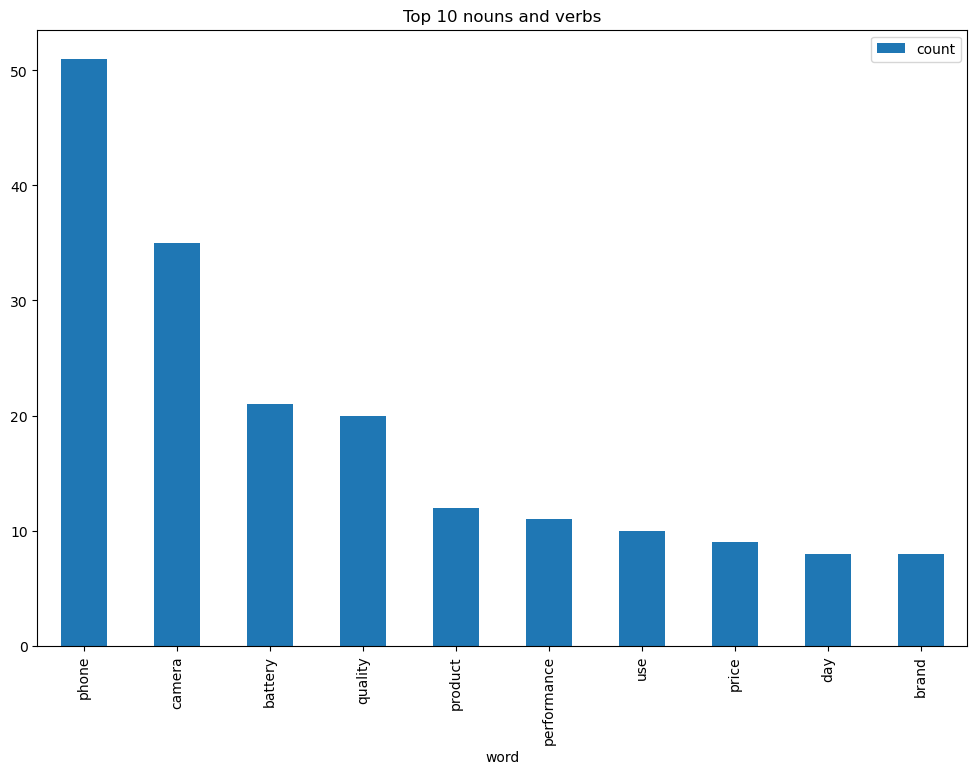

In [71]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs')

In [72]:
# BOW features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

In [73]:
# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [74]:
sentiments_using_SIA = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

Clean_Reviews
pos             96
neg              4

In [75]:
dataframe.Clean_Reviews[8]

'never know android device feel look better low budget samsung phone'

In [76]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(dataframe.Clean_Reviews[8])

{'neg': 0.15, 'neu': 0.643, 'pos': 0.207, 'compound': 0.2023}

In [77]:
df=pd.DataFrame()
df['Review'] = dataframe.Clean_Reviews
df['scores'] = dataframe['Clean_Reviews'].apply(lambda review: sid.polarity_scores(review))
df.head()

Review  \
0  purchased gb version phone come extendable gb ...   
1  try keep review short review perspective avera...   
2  good phone low budget side curved make difficu...   
3  review using phone month nice phone budget ram...   
4                                        cam nt good   

                                              scores  
0  {'neg': 0.069, 'neu': 0.684, 'pos': 0.247, 'co...  
1  {'neg': 0.043, 'neu': 0.704, 'pos': 0.253, 'co...  
2  {'neg': 0.341, 'neu': 0.444, 'pos': 0.215, 'co...  
3  {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp...  
4  {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...

In [78]:
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df.head()

Review  \
0  purchased gb version phone come extendable gb ...   
1  try keep review short review perspective avera...   
2  good phone low budget side curved make difficu...   
3  review using phone month nice phone budget ram...   
4                                        cam nt good   

                                              scores  compound  
0  {'neg': 0.069, 'neu': 0.684, 'pos': 0.247, 'co...    0.9876  
1  {'neg': 0.043, 'neu': 0.704, 'pos': 0.253, 'co...    0.9776  
2  {'neg': 0.341, 'neu': 0.444, 'pos': 0.215, 'co...   -0.1779  
3  {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp...    0.9260  
4  {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...    0.4404

In [79]:
df['sentiment'] = df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
df

Review  \
0   purchased gb version phone come extendable gb ...   
1   try keep review short review perspective avera...   
2   good phone low budget side curved make difficu...   
3   review using phone month nice phone budget ram...   
4                                         cam nt good   
..                                                ...   
95  camera quality little bit low high price versi...   
96  loved colour sky blue looked exceptional opene...   
97                                      awesome phone   
98  perfect phone mid range one best product marke...   
99                                                nan   

                                               scores  compound sentiment  
0   {'neg': 0.069, 'neu': 0.684, 'pos': 0.247, 'co...    0.9876  Positive  
1   {'neg': 0.043, 'neu': 0.704, 'pos': 0.253, 'co...    0.9776  Positive  
2   {'neg': 0.341, 'neu': 0.444, 'pos': 0.215, 'co...   -0.1779  Negative  
3   {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp...    0.9260  Positive  
4   {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...    0.4404  Positive  
..                                                ...       ...       ...  
95  {'neg': 0.093, 'neu': 0.612, 'pos': 0.296, 'co...    0.6096  Positive  
96  {'neg': 0.032, 'neu': 0.699, 'pos': 0.269, 'co...    0.9558  Positive  
97  {'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...    0.6249  Positive  
98  {'neg': 0.0, 'neu': 0.554, 'pos': 0.446, 'comp...    0.9201  Positive  
99  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   Neutral  

[100 rows x 4 columns]

In [80]:
from collections import defaultdict
from plotly import tools
from plotly.offline import iplot
#Filtering data
positive_review = df[df["sentiment"]=='Positive'].dropna()
neutral_review = df[df["sentiment"]=='Neutral'].dropna()
negative_review = df[df["sentiment"]=='Negative'].dropna()

## custom function for ngram generation ##
def generate_ngrams(text, n_gram = 1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y =df["word"].values[::-1],
        x = df["wordcount"].values[::-1],
        showlegend = False,
        orientation = 'h',
        marker = dict(
            color = color,
        ),
    )
    return trace
## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in positive_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(20), 'blue')


## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in neutral_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(20), 'purple')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in negative_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(20), 'yellow')

# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing = 0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')

C:\ProgramData\Anaconda3\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



<AxesSubplot:xlabel='sentiment', ylabel='count'>

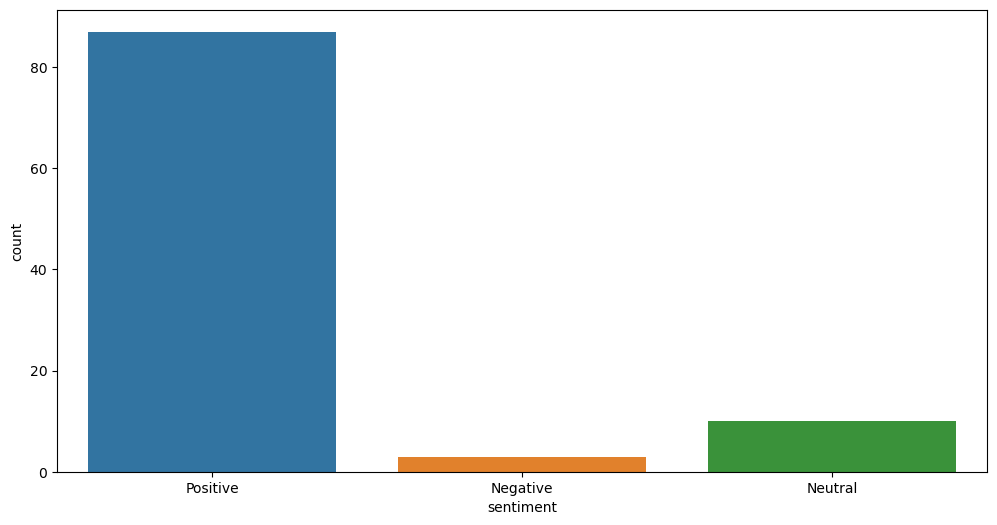

In [81]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='compound', ylabel='Density'>

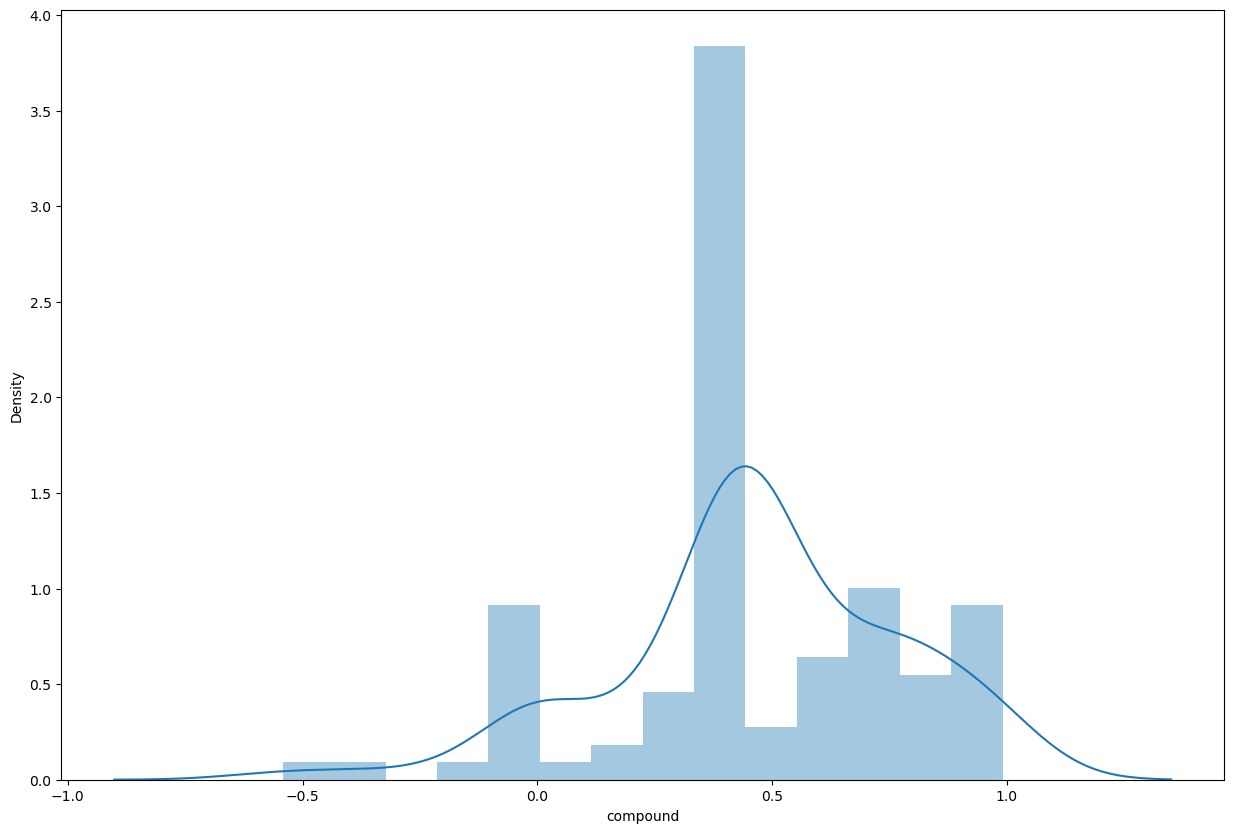

In [82]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(df['compound'])

In [83]:
df['word_count'] = df.apply(lambda x: len(str(x).split(" ")))
df[['word_count']].head()

word_count
0         NaN
1         NaN
2         NaN
3         NaN
4         NaN

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='compound'>

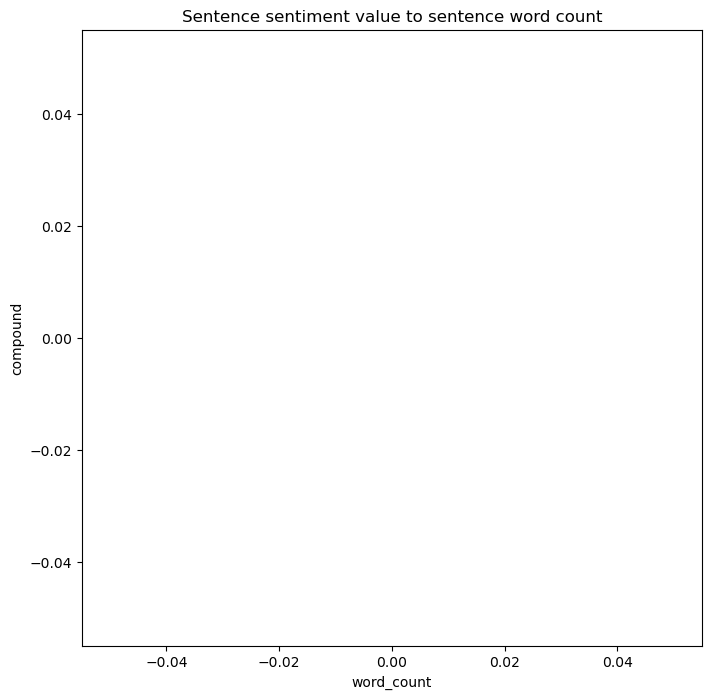

In [84]:
# Correlation analysis
df.plot.scatter(x='word_count',y='compound',figsize=(8,8),title='Sentence sentiment value to sentence word count')

In [85]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(sentiments_using_textblob.value_counts())

Clean_Reviews
pos             94
neg              6

In [86]:
 # let's calculate subjectivity and Polarity
# function for subjectivity
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity
 
# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity
 
dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

Clean_Reviews  \
0  purchased gb version phone come extendable gb ...   
1  try keep review short review perspective avera...   
2  good phone low budget side curved make difficu...   
3  review using phone month nice phone budget ram...   
4                                        cam nt good   

                                   Uncleaned_Reviews  Subjectivity  Polarity  
0  I've purchased the 6GB version of this phone w...      0.486111  0.180556  
1  I will try to keep this review short. This rev...      0.498519  0.169769  
2  Good phone in a low budget, just the sides are...      0.633333  0.066667  
3  This review is after using this phone for 2 mo...      0.875000  0.603125  
4                                Cam is nt that good      0.600000  0.700000

Text(0, 0.5, 'Subjectivity')

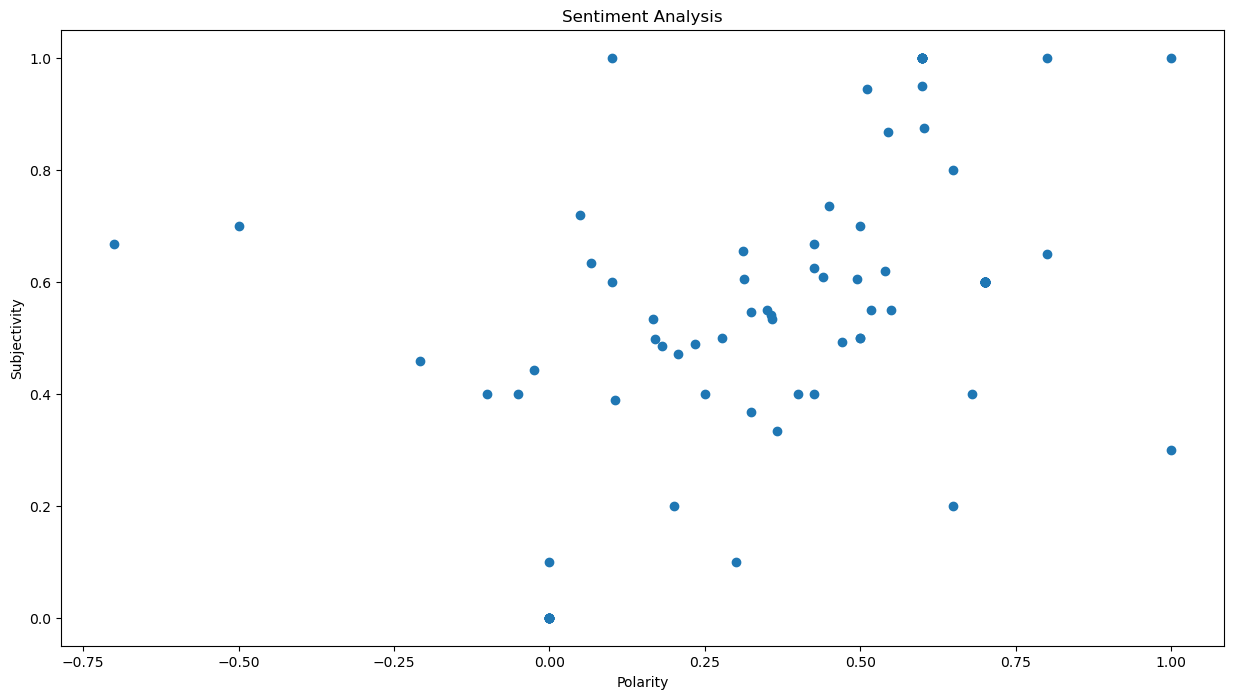

In [87]:
f, axes = plt.subplots(figsize = (15,8))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [88]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")


type_ = ["Positive", "Neutral", "Negative"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=df['sentiment'].value_counts(), name="sentiment"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Sentiment Analysis",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Sentiment', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [89]:
dataframe['sentiment'] = sentiments_using_SIA
dataframe.to_csv("clean_review.csv",index=False)
dataframe.head()

Clean_Reviews  \
0  purchased gb version phone come extendable gb ...   
1  try keep review short review perspective avera...   
2  good phone low budget side curved make difficu...   
3  review using phone month nice phone budget ram...   
4                                        cam nt good   

                                   Uncleaned_Reviews  Subjectivity  Polarity  \
0  I've purchased the 6GB version of this phone w...      0.486111  0.180556   
1  I will try to keep this review short. This rev...      0.498519  0.169769   
2  Good phone in a low budget, just the sides are...      0.633333  0.066667   
3  This review is after using this phone for 2 mo...      0.875000  0.603125   
4                                Cam is nt that good      0.600000  0.700000   

  sentiment  
0       pos  
1       pos  
2       neg  
3       pos  
4       pos

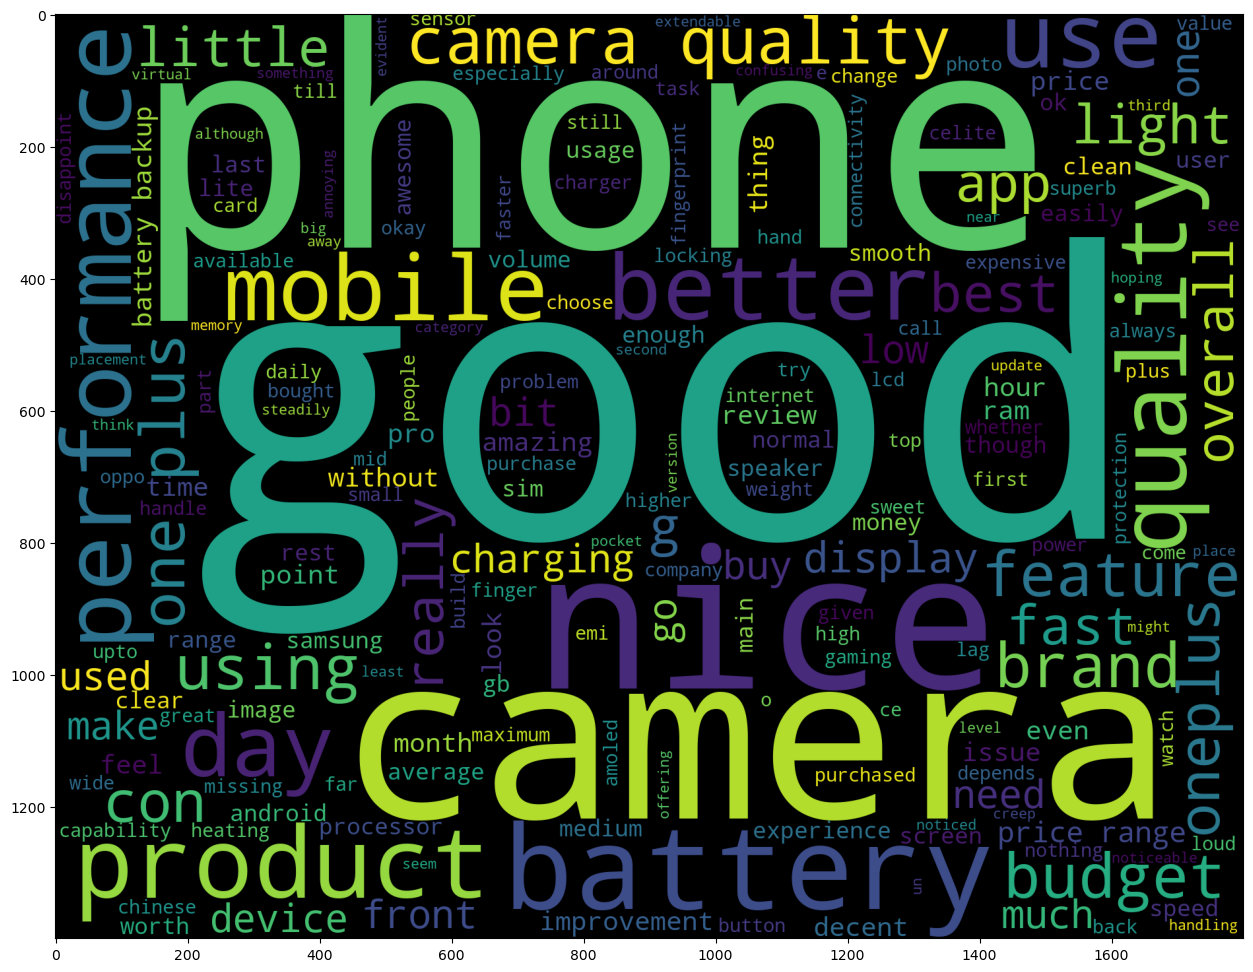

In [90]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(20,12))
wordcloud= WordCloud(
        background_color = 'black',
        width = 1800,
        height =1400).generate(allWords_)
plt.imshow(wordcloud)

In [91]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

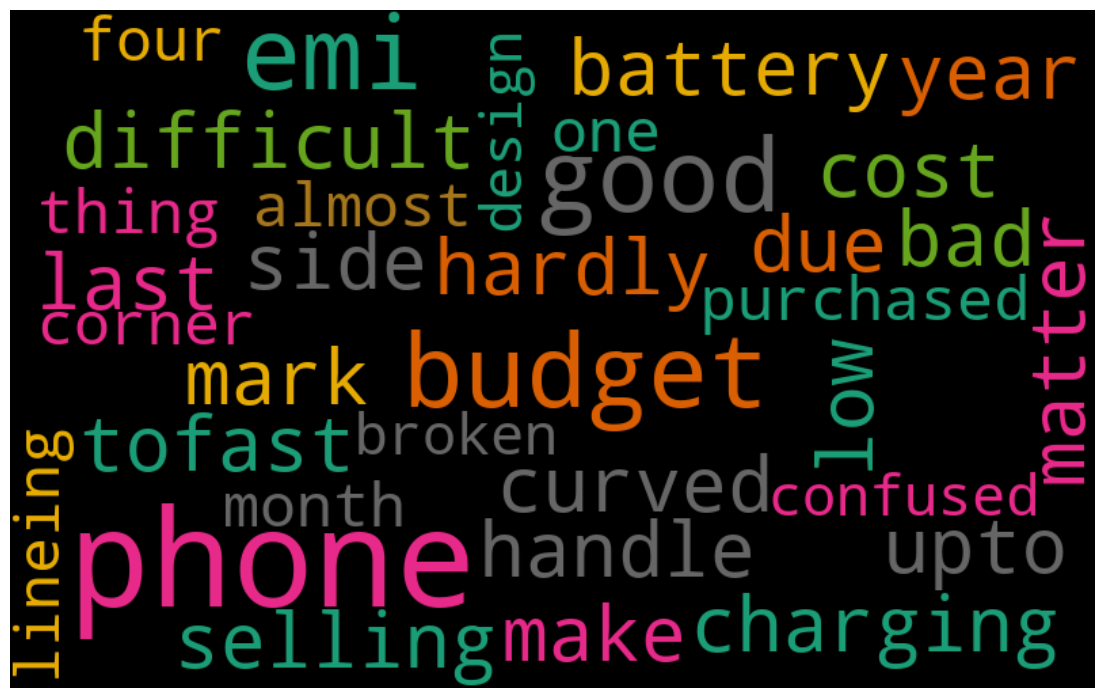

In [92]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)